In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv("after_merge.csv")
df

,Unnamed: 0,SKU,STORE,COST,RETAIL,REGISTER,TRANNUM,SEQ,SALEDATE,STYPE,QUANTITY,ORGPRICE,SPRICE,AMT,INTERID,MIC,CITY,STATE,ZIP
0,0,3,4603,123.36,440.0,100,1200,0,2005-04-12,R,1,440.00,30.00,30.00,3400000,333,CORALVILLE,IA,52241
1,1,6819,4603,4.00,2.5,470,1600,0,2005-07-23,P,1,9.99,2.00,2.00,139000038,87,CORALVILLE,IA,52241
2,2,9633,4603,13.50,22.5,280,1200,0,2004-11-03,P,1,21.00,21.00,21.00,512500049,281,CORALVILLE,IA,52241
3,3,10896,4603,11.10,18.5,390,1900,0,2004-09-01,P,1,18.50,18.50,18.50,521400008,281,CORALVILLE,IA,52241
4,4,17379,4603,24.03,16.0,500,1800,0,2005-07-07,P,1,64.00,16.00,16.00,526900029,689,CORALVILLE,IA,52241
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1134482,1134482,9888223,7604,9.32,16.0,340,1000,670805443,2005-08-20,P,1,32.00,16.00,16.00,509400085,697,RICHMOND,VA,23233
1134483,1134483,9928678,7604,7.25,4.5,70,5900,0,2005-08-20,P,1,18.00,4.50,4.50,189400107,810,RICHMOND,VA,23233
1134484,1134484,9957390,7604,17.10,28.5,770,200,0,2005-08-06,P,1,28.50,28.50,28.50,581500061,643,RICHMOND,VA,23233
1134485,1134485,9979437,7604,148.50,134.3,350,600,941208922,2005-08-23,P,1,395.00,94.01,94.01,77600063,983,RICHMOND,VA,23233


In [3]:
print(df.isnull().sum())

Unnamed: 0    0
SKU           0
STORE         0
COST          0
RETAIL        0
REGISTER      0
TRANNUM       0
SEQ           0
SALEDATE      0
STYPE         0
QUANTITY      0
ORGPRICE      0
SPRICE        0
AMT           0
INTERID       0
MIC           0
CITY          0
STATE         0
ZIP           0
dtype: int64


In [4]:
print(df.duplicated().sum())

0


In [5]:
#Clean SaleDate 
df['SALEDATE'] = pd.to_datetime(df['SALEDATE'])
df.drop(['Unnamed: 0', 'SEQ'], axis=1, inplace=True) 
df['Day'] = df['SALEDATE'].dt.day
df['Month'] = df['SALEDATE'].dt.month
df['Year'] = df['SALEDATE'].dt.year
df = df.drop('SALEDATE', axis=1)

#Label Encode City/State
label_encoder = LabelEncoder()
df['CITY'] = label_encoder.fit_transform(df['CITY'])
df['STATE'] = label_encoder.fit_transform(df['STATE'])

In [6]:
store_metrics = df.groupby('STORE').agg({
    'RETAIL': 'mean',
    'AMT': 'sum',
}).reset_index()

store_metrics.columns = ['STORE', 'AvgRetailPrice', 'TotalSalesAmount']

df = pd.merge(df, store_metrics, on='STORE', how='left')

In [7]:
#Create Dummies
df = pd.get_dummies(df, columns=['STYPE'], drop_first=True)

In [8]:
df

,SKU,STORE,COST,RETAIL,REGISTER,TRANNUM,QUANTITY,ORGPRICE,SPRICE,AMT,...,MIC,CITY,STATE,ZIP,Day,Month,Year,AvgRetailPrice,TotalSalesAmount,STYPE_R
0,3,4603,123.36,440.0,100,1200,1,440.00,30.00,30.00,...,333,57,7,52241,12,4,2005,19.332509,53933.43,1
1,6819,4603,4.00,2.5,470,1600,1,9.99,2.00,2.00,...,87,57,7,52241,23,7,2005,19.332509,53933.43,0
2,9633,4603,13.50,22.5,280,1200,1,21.00,21.00,21.00,...,281,57,7,52241,3,11,2004,19.332509,53933.43,0
3,10896,4603,11.10,18.5,390,1900,1,18.50,18.50,18.50,...,281,57,7,52241,1,9,2004,19.332509,53933.43,0
4,17379,4603,24.03,16.0,500,1800,1,64.00,16.00,16.00,...,689,57,7,52241,7,7,2005,19.332509,53933.43,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1134482,9888223,7604,9.32,16.0,340,1000,1,32.00,16.00,16.00,...,697,207,27,23233,20,8,2005,22.501200,8276.62,0
1134483,9928678,7604,7.25,4.5,70,5900,1,18.00,4.50,4.50,...,810,207,27,23233,20,8,2005,22.501200,8276.62,0
1134484,9957390,7604,17.10,28.5,770,200,1,28.50,28.50,28.50,...,643,207,27,23233,6,8,2005,22.501200,8276.62,0
1134485,9979437,7604,148.50,134.3,350,600,1,395.00,94.01,94.01,...,983,207,27,23233,23,8,2005,22.501200,8276.62,0


In [9]:
print(df.dtypes)

SKU                   int64
STORE                 int64
COST                float64
RETAIL              float64
REGISTER              int64
TRANNUM               int64
QUANTITY              int64
ORGPRICE            float64
SPRICE              float64
AMT                 float64
INTERID               int64
MIC                   int64
CITY                  int64
STATE                 int64
ZIP                   int64
Day                   int64
Month                 int64
Year                  int64
AvgRetailPrice      float64
TotalSalesAmount    float64
STYPE_R               uint8
dtype: object


# Visualizations

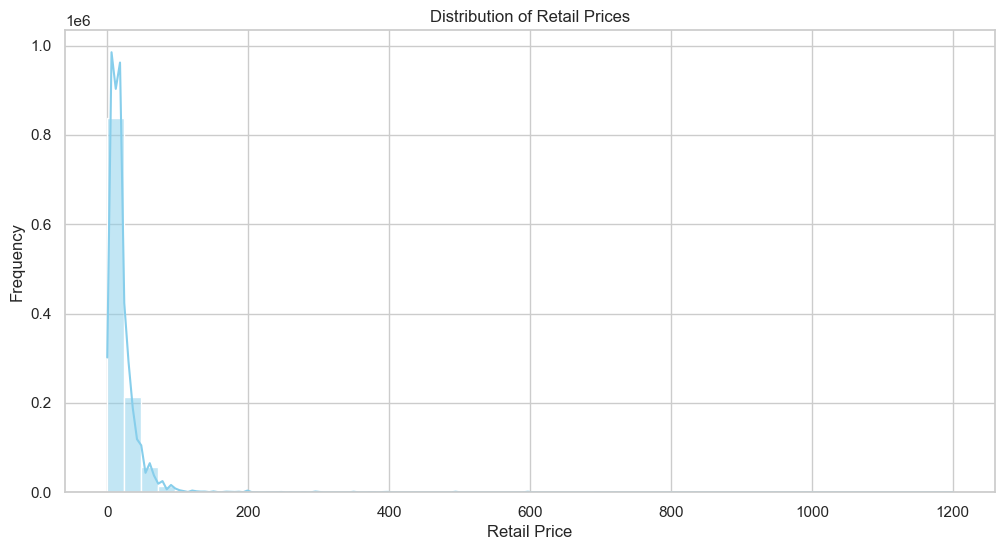

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.histplot(df['RETAIL'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Retail Prices')
plt.xlabel('Retail Price')
plt.ylabel('Frequency')
plt.show()

/var/folders/cq/gb8md3g17dx_n11dzhh41nbr0000gp/T/ipykernel_81356/25533956.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='COST', y='RETAIL', data=df, palette='viridis', alpha=0.7)


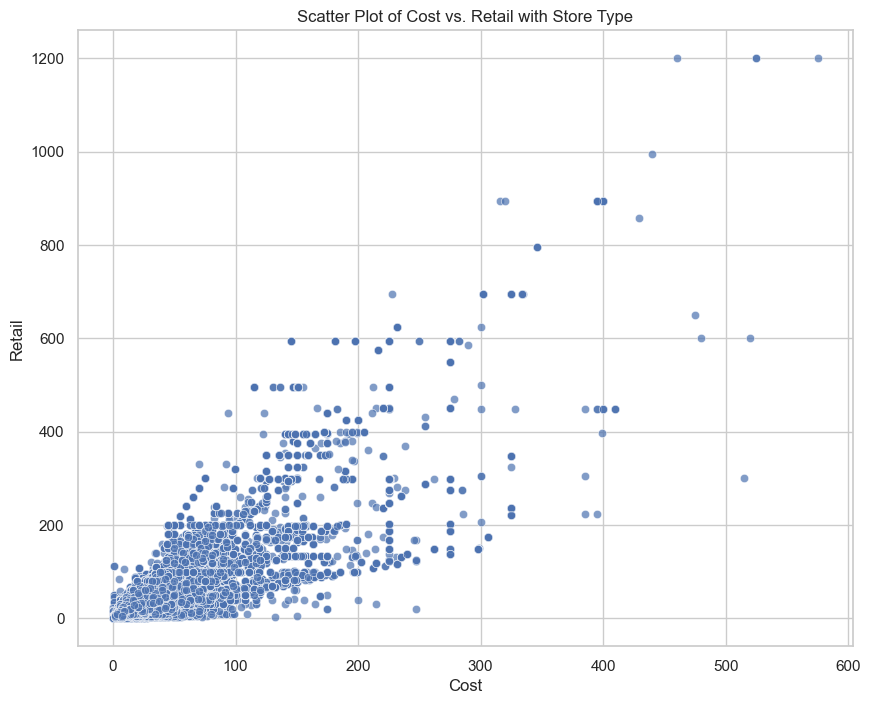

In [11]:
# Scatter plot of COST vs. RETAIL
plt.figure(figsize=(10, 8))
sns.scatterplot(x='COST', y='RETAIL', data=df, palette='viridis', alpha=0.7)
plt.title('Scatter Plot of Cost vs. Retail with Store Type')
plt.xlabel('Cost')
plt.ylabel('Retail')
plt.show()

/var/folders/cq/gb8md3g17dx_n11dzhh41nbr0000gp/T/ipykernel_81356/3855573295.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='CITY', y='RETAIL', data=df_top15, ci=None, palette='viridis', order=top_cities)


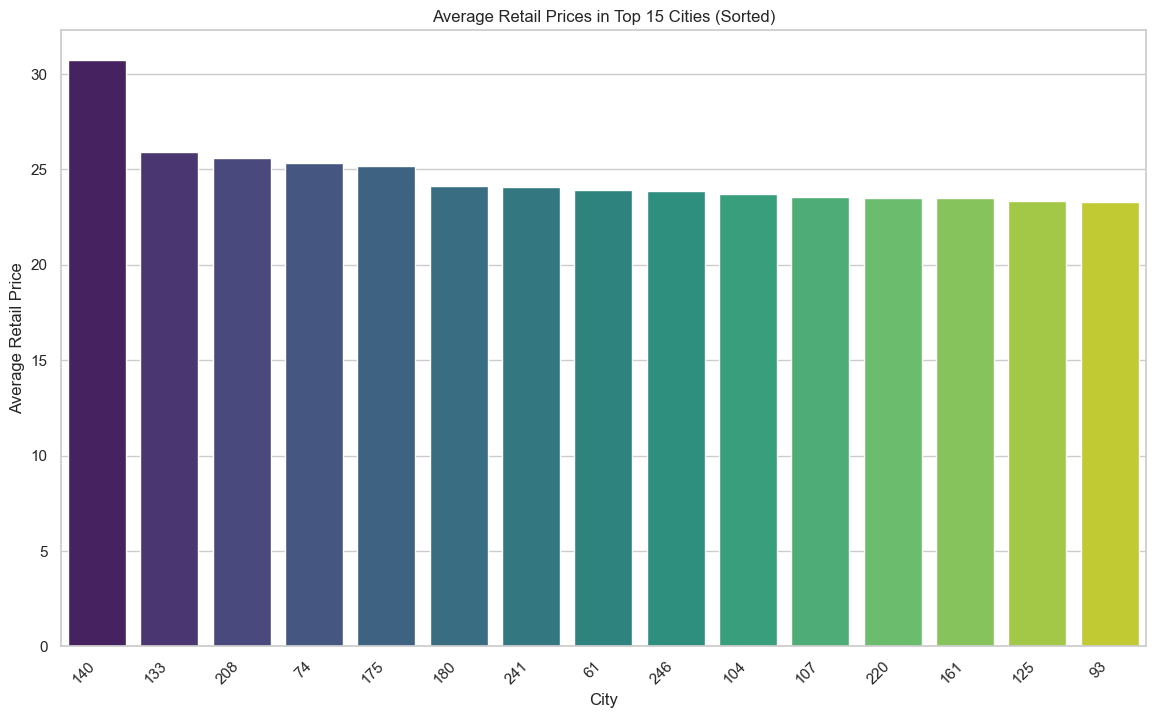

In [12]:
average_prices = df.groupby('CITY')['RETAIL'].mean().reset_index()
top_cities = average_prices.nlargest(15, 'RETAIL')['CITY']
df_top15 = df[df['CITY'].isin(top_cities)]


plt.figure(figsize=(14, 8))
sns.barplot(x='CITY', y='RETAIL', data=df_top15, ci=None, palette='viridis', order=top_cities)
plt.title('Average Retail Prices in Top 15 Cities (Sorted)')
plt.xlabel('City')
plt.ylabel('Average Retail Price')
plt.xticks(rotation=45, ha='right')
plt.show()


/var/folders/cq/gb8md3g17dx_n11dzhh41nbr0000gp/T/ipykernel_81356/707063137.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='CITY', y='AMT', data=sorted_cities, ci=None, palette='viridis', order=sorted_cities['CITY'])


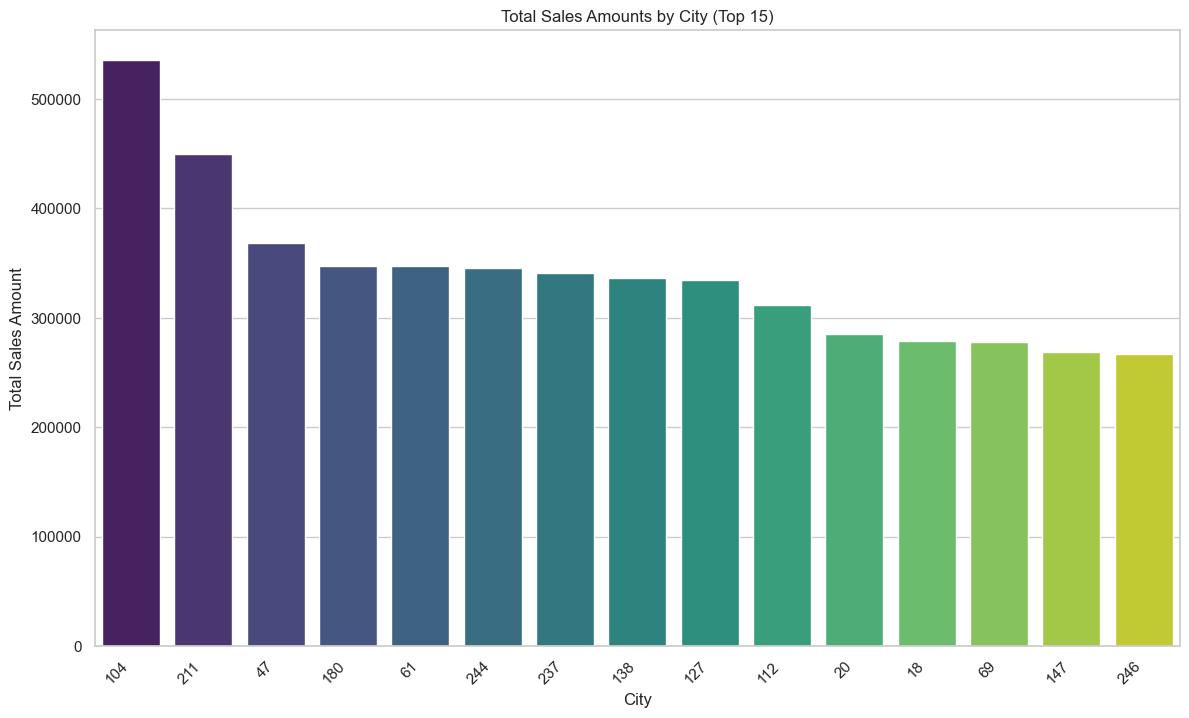

In [13]:
city_sales = df.groupby('CITY')['AMT'].sum().reset_index()
sorted_cities = city_sales.sort_values(by='AMT', ascending=False).head(15)

plt.figure(figsize=(14, 8))
sns.barplot(x='CITY', y='AMT', data=sorted_cities, ci=None, palette='viridis', order=sorted_cities['CITY'])
plt.title('Total Sales Amounts by City (Top 15)')
plt.xlabel('City')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=45, ha='right')
plt.show()


/var/folders/cq/gb8md3g17dx_n11dzhh41nbr0000gp/T/ipykernel_81356/525301008.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='STORE', y='AMT', data=sorted_stores, ci=None, palette='viridis', order=sorted_stores['STORE'])


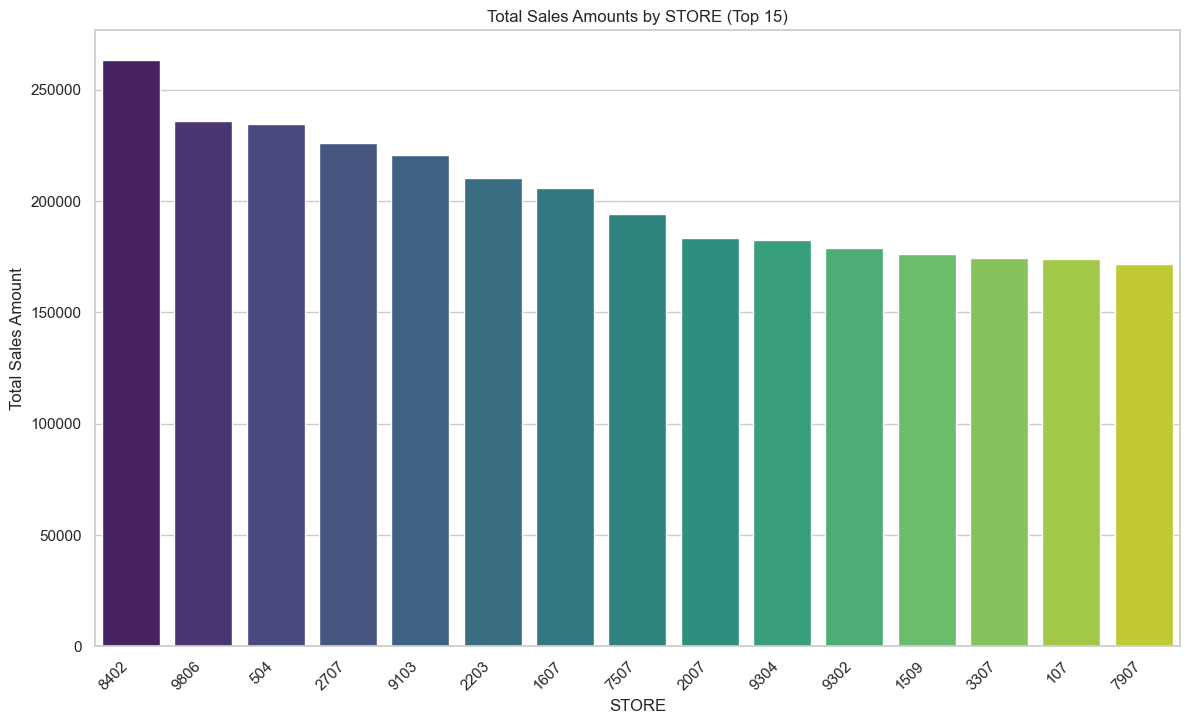

In [14]:
store_sales = df.groupby('STORE')['AMT'].sum().reset_index()
sorted_stores = store_sales.sort_values(by='AMT', ascending=False).head(15)

plt.figure(figsize=(14, 8))
sns.barplot(x='STORE', y='AMT', data=sorted_stores, ci=None, palette='viridis', order=sorted_stores['STORE'])
plt.title('Total Sales Amounts by STORE (Top 15)')
plt.xlabel('STORE')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=45, ha='right')
plt.show()

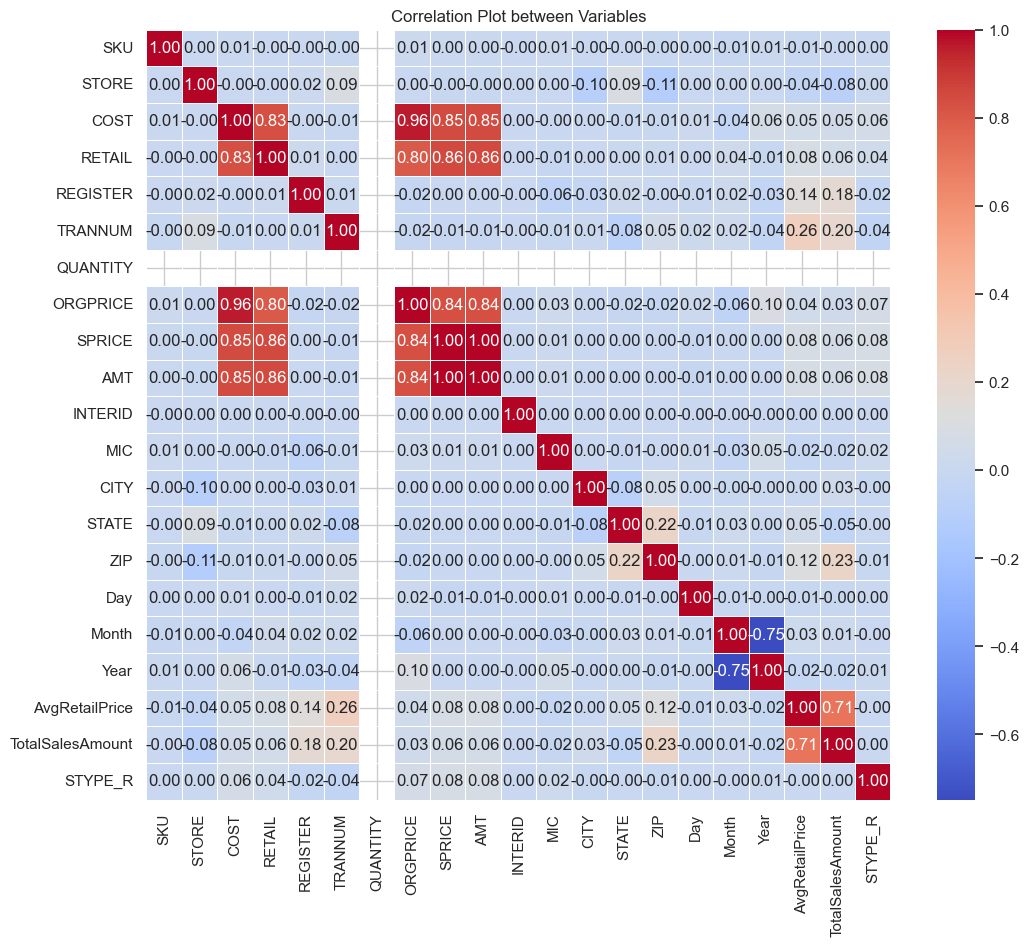

In [15]:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Plot between Variables')
plt.show()

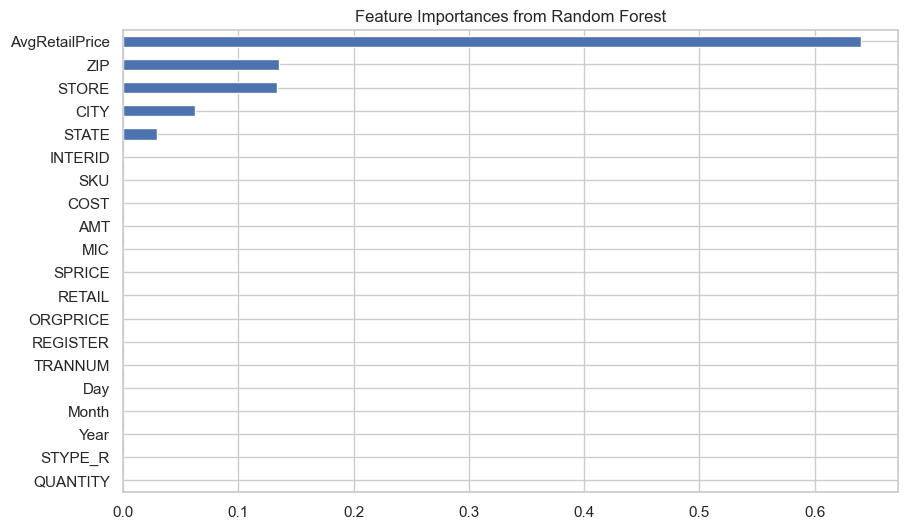

In [16]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import matplotlib.pyplot as plt

X = df.drop('TotalSalesAmount', axis=1)
y = df['TotalSalesAmount']

rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X, y)

feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)

plt.figure(figsize=(10, 6))
feature_importances.sort_values().plot(kind='barh')
plt.title('Feature Importances from Random Forest')
plt.show()